In [1]:
import pandas as pd

In [2]:
ds = pd.read_csv('datasets/Social_Network_Ads.csv')

In [3]:
ds

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [12]:
ds.drop(['User ID'] , axis=1, inplace=True)

In [13]:
ds.drop(['Gender'] , axis=1, inplace=True)

In [14]:
ds

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [15]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [17]:
ds.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [18]:
X = ds[['Age', 'EstimatedSalary']]

In [19]:
y = ds [['Purchased']]

In [21]:
import seaborn as sns

In [22]:
sns.set()

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

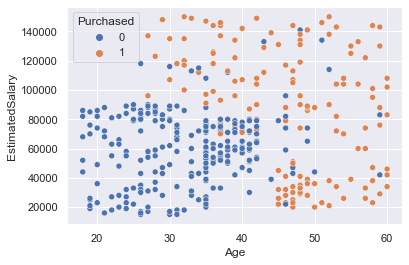

In [24]:
sns.scatterplot(data=ds, x='Age', y='EstimatedSalary', hue='Purchased')

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc = StandardScaler()

In [31]:
X_train_scaled = sc.fit_transform(X_train)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
model = KNeighborsClassifier(n_neighbors=15)

In [36]:
model.fit(X_train_scaled, y_train)

C:\Users\mtabishk\.conda\envs\ml-env\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=15)

In [39]:
model.weights

'uniform'

In [40]:
X_test_scaled = sc.transform(X_test)

In [41]:
y_pred = model.predict(X_test_scaled)

In [42]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [43]:
y_test

,Purchased
209,0
280,1
33,0
210,1
93,0
...,...
332,0
167,0
245,1
311,1


In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [45]:
confusion_matrix(y_pred, y_test)

array([[76,  4],
       [ 4, 48]], dtype=int64)

In [48]:
accuracy_score(y_pred, y_test)

0.9393939393939394